# Rotten Tomatoes Movies Rating Prediction

# 1. Define project

I used dataset from Rotten Tomatoes - a popular online review aggregator for film and television. The movies on the website are labeled as 'Rotten', 'Fresh', or 'Certified-Fresh'. In this project, I will develop a high performing classification algorithm to predict movie labels according to different attributes.

There are several techniquest to perform the multi classifcation task. In this project, I will use Decision Tree, Random Forest, Naive Bayes, and KNN for this project and compare their performance.

# 2. Data exploration

In [1]:
# Import movie data
import pandas as pd
df_movie = pd.read_csv('rotten_tomatoes_movies.csv')
print(str(df_movie.shape))
df_movie.head()

(17712, 22)


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [2]:
# Check data distribution
df_movie.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


In [3]:
# Check number of unique values, duplicated values, missing values, data type
def check(df):
    """
    Check number of unique values, duplicated values, missing values, data type
    Parameter
    ---------
    df: pandas data frame
    """
    print('Data shape:', str(df.shape))
    df_check = pd.DataFrame({'No. unique values':df.nunique(),
                             'Duplicated':df.duplicated().sum(),
                             'Missing values ratio':df.isnull().sum()/len(df),
                             'Dtype':df.dtypes})
    
    return df_check

In [4]:
# Check movie data
check(df_movie)

Data shape: (17712, 22)


,No. unique values,Duplicated,Missing values ratio,Dtype
rotten_tomatoes_link,17712,0,0.000000,object
movie_title,17106,0,0.000000,object
movie_info,17389,0,0.018123,object
critics_consensus,9132,0,0.484304,object
content_rating,6,0,0.000000,object
genres,1106,0,0.001073,object
directors,8933,0,0.010953,object
authors,12989,0,0.087060,object
actors,17330,0,0.019874,object
original_release_date,5804,0,0.065831,object


array([[<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'tomatometer_rating'}>,
        <AxesSubplot:title={'center':'tomatometer_count'}>],
       [<AxesSubplot:title={'center':'audience_rating'}>,
        <AxesSubplot:title={'center':'audience_count'}>,
        <AxesSubplot:title={'center':'tomatometer_top_critics_count'}>],
       [<AxesSubplot:title={'center':'tomatometer_fresh_critics_count'}>,
        <AxesSubplot:title={'center':'tomatometer_rotten_critics_count'}>,
        <AxesSubplot:>]], dtype=object)

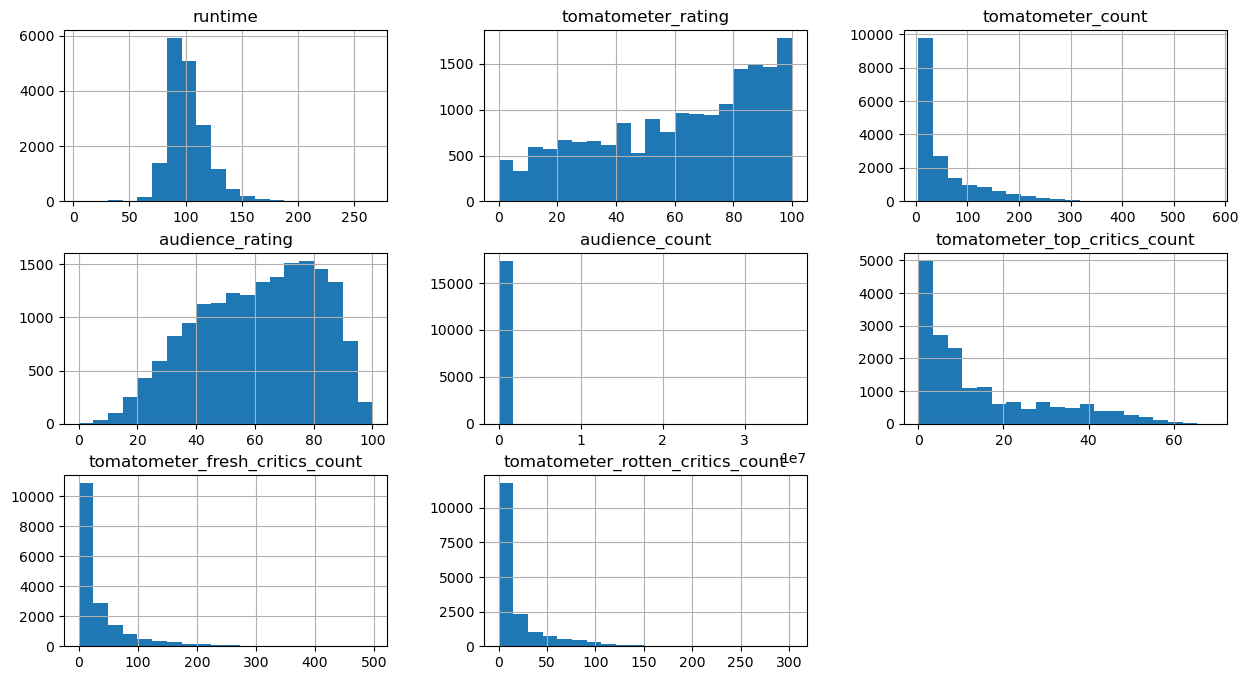

In [5]:
# Visualize the data distribution
import seaborn as sns
df_movie.hist(figsize=(15,8),bins=20)

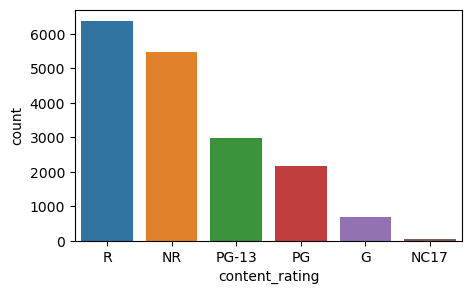

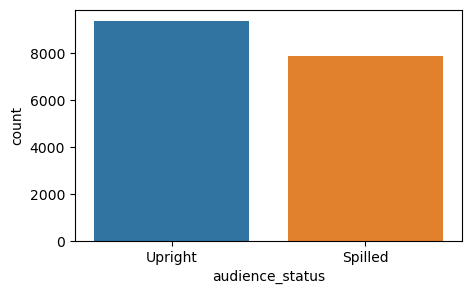

In [6]:
# Explore data distribution of important categorical variables
import seaborn as sns
import matplotlib.pyplot as plt
cat_features = ['content_rating','audience_status']
for var in cat_features:
    fig = plt.figure(figsize=(5,3))
    sns.countplot(data=df_movie, x = var, order= df_movie[var].value_counts().index)
    plt.show()

<AxesSubplot:xlabel='tomatometer_status', ylabel='count'>

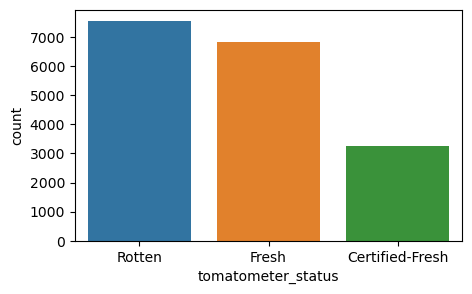

In [7]:
# Explore data distribution of the target variable
fig = plt.figure(figsize=(5,3))
sns.countplot(data=df_movie, x = 'tomatometer_status', order= df_movie['tomatometer_status'].value_counts().index)

# 3. Data Processing and Develop Classification Models 

## 3.1. Choose all possible numeric and categorical features

In [8]:
df_movie.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [9]:
# Set up selected feature dataframe
df_feature = df_movie[['content_rating', 'runtime', 'tomatometer_rating',\
       'tomatometer_count', 'audience_status', 'audience_rating',\
       'audience_count', 'tomatometer_top_critics_count',\
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count','tomatometer_status']]

In [10]:
df_feature.head()

,content_rating,runtime,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,tomatometer_status
0,PG,119.0,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Rotten
1,R,90.0,87.0,142.0,Upright,64.0,11574.0,44,123,19,Certified-Fresh
2,R,122.0,67.0,24.0,Spilled,53.0,14684.0,2,16,8,Fresh
3,NR,95.0,100.0,54.0,Upright,97.0,105386.0,6,54,0,Certified-Fresh
4,G,127.0,89.0,27.0,Upright,74.0,68918.0,5,24,3,Fresh


In [11]:
# Create dummy variables for column 'content_rating'
df_feature = pd.get_dummies(df_feature,columns=['content_rating'])
df_feature.columns

Index(['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_status',
       'audience_rating', 'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'tomatometer_status', 'content_rating_G', 'content_rating_NC17',
       'content_rating_NR', 'content_rating_PG', 'content_rating_PG-13',
       'content_rating_R'],
      dtype='object')

In [12]:
# Encode audience_status with ordinal encoding
df_feature['audience_status'] = df_feature['audience_status'].apply(lambda x: 1 if x=='Upright' else 0)
df_feature['audience_status'].value_counts()

1    9390
0    8322
Name: audience_status, dtype: int64

In [13]:
# Drop missing values and check if there are any missing values in the dataset
df_feature.dropna(axis=0, how='any',inplace = True)
df_feature.isna().sum()

runtime                             0
tomatometer_rating                  0
tomatometer_count                   0
audience_status                     0
audience_rating                     0
audience_count                      0
tomatometer_top_critics_count       0
tomatometer_fresh_critics_count     0
tomatometer_rotten_critics_count    0
tomatometer_status                  0
content_rating_G                    0
content_rating_NC17                 0
content_rating_NR                   0
content_rating_PG                   0
content_rating_PG-13                0
content_rating_R                    0
dtype: int64

In [14]:
# Encode target variable
df_feature['tomatometer_status'] = df_movie['tomatometer_status'].replace(['Rotten','Fresh','Certified-Fresh'],[0,1,2])
df_feature['tomatometer_status'].value_counts()

0.0    7429
1.0    6507
2.0    3232
Name: tomatometer_status, dtype: int64

In [15]:
# Define independent and target variables
X_df = df_feature.drop('tomatometer_status',axis=1)
Y = df_feature['tomatometer_status']

In [17]:
# Develop evaluation dataframe to record result from multiple model
evaluate_df = pd.DataFrame(columns = ['classifier','accuracy'])
evaluate_df

,classifier,accuracy


In [18]:
# Develop function to perform classifer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

def classifier(classifier_name, _classifier, _X, _Y):
    """
    Split data to training and testing data set then fit the classifier with training data. 
    Calculate the predicted value, accuracy score and generate classification report.
    Add classification metrics into the evaluate dataframe so that I can compare different models.
    
    Parameters
    ----------
    classifier_name: str -> name of the classifier
    _classifier: classifier algorithm
    _X: pandas series -> independent varibales
    _Y: pandas serie -> target variable
    """
    X_train, X_test, y_train, y_test = train_test_split(_X, _Y, test_size = 0.2, random_state = 42)
    print(f'Length of train data is {len(X_train)} and length of test data is {len(X_test)}')
    _classifier.fit(X_train, y_train)
    y_pred = _classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test,y_pred)
    
    # Create confusion matrix
    cf_matrix = confusion_matrix(y_test,y_pred)
    
    #Print accuracy and classification report on test data
    print(f'Accuracy of {classifier_name} is {accuracy}')
    print(f'Classification report: \n {classification_report(y_test, y_pred)}')
    
    # Plot confusion matrix on test data
    print('Confusion matrix:')
    plot_confusion_matrix(cf_matrix, cmap='Blues', figsize=(5,3))
    
    # Add values into the evaluation table
    evaluate_df.loc[len(evaluate_df),:] = [classifier_name, accuracy]

In [19]:
# Define models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

random_forest = RandomForestClassifier(random_state=2)
decision_tree_5_leaf = DecisionTreeClassifier(random_state=2, max_leaf_nodes=5)
decision_tree = DecisionTreeClassifier(random_state=2)
naive_bayes = GaussianNB()
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_7 = KNeighborsClassifier(n_neighbors=7)

Length of train data is 13734 and length of test data is 3434
Accuracy of random_forest is 0.9906814210832848
Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1487
         1.0       0.98      0.99      0.99      1289
         2.0       0.99      0.96      0.98       658

    accuracy                           0.99      3434
   macro avg       0.99      0.99      0.99      3434
weighted avg       0.99      0.99      0.99      3434

Confusion matrix:


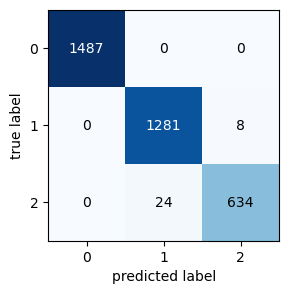

In [20]:
# Run Random Forest model
classifier('random_forest',random_forest,X_df,Y)

Length of train data is 13734 and length of test data is 3434
Accuracy of decision_tree_5_leaf is 0.9912638322655795
Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1487
         1.0       0.98      0.99      0.99      1289
         2.0       0.99      0.97      0.98       658

    accuracy                           0.99      3434
   macro avg       0.99      0.99      0.99      3434
weighted avg       0.99      0.99      0.99      3434

Confusion matrix:


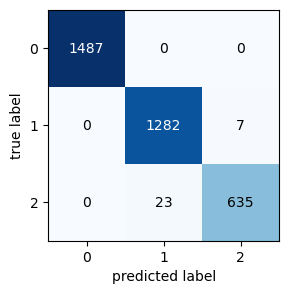

In [21]:
# Run Decision Tree 5 leafs
classifier('decision_tree_5_leaf',decision_tree_5_leaf,X_df,Y)

Length of train data is 13734 and length of test data is 3434
Accuracy of decision_tree is 0.9895165987186954
Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1487
         1.0       0.98      0.99      0.99      1289
         2.0       0.98      0.97      0.97       658

    accuracy                           0.99      3434
   macro avg       0.99      0.99      0.99      3434
weighted avg       0.99      0.99      0.99      3434

Confusion matrix:


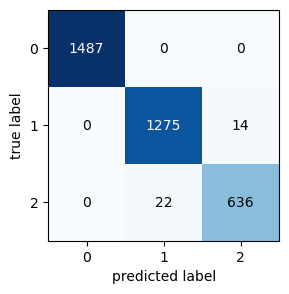

In [22]:
# Run Decision Tree Unconstrained
classifier('decision_tree',decision_tree,X_df,Y)

Length of train data is 13734 and length of test data is 3434
Accuracy of naive_bayes is 0.633954571927781
Classification report: 
               precision    recall  f1-score   support

         0.0       0.98      0.51      0.67      1487
         1.0       0.51      0.95      0.67      1289
         2.0       0.71      0.30      0.42       658

    accuracy                           0.63      3434
   macro avg       0.73      0.59      0.59      3434
weighted avg       0.75      0.63      0.62      3434

Confusion matrix:


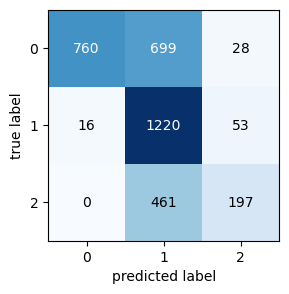

In [23]:
classifier('naive_bayes',naive_bayes,X_df,Y)

Length of train data is 13734 and length of test data is 3434
Accuracy of knn_3 is 0.7856726849155504
Classification report: 
               precision    recall  f1-score   support

         0.0       0.79      0.86      0.82      1487
         1.0       0.82      0.80      0.81      1289
         2.0       0.71      0.60      0.65       658

    accuracy                           0.79      3434
   macro avg       0.77      0.75      0.76      3434
weighted avg       0.78      0.79      0.78      3434

Confusion matrix:


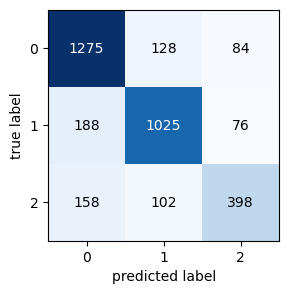

In [24]:
classifier('knn_3',knn_3,X_df,Y)

Length of train data is 13734 and length of test data is 3434
Accuracy of knn_5 is 0.7807221898660455
Classification report: 
               precision    recall  f1-score   support

         0.0       0.78      0.87      0.82      1487
         1.0       0.80      0.79      0.80      1289
         2.0       0.73      0.54      0.62       658

    accuracy                           0.78      3434
   macro avg       0.77      0.74      0.75      3434
weighted avg       0.78      0.78      0.78      3434

Confusion matrix:


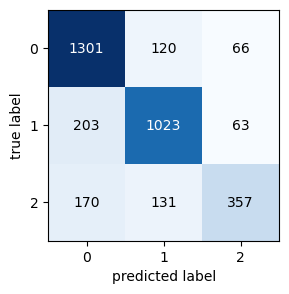

In [25]:
classifier('knn_5',knn_5,X_df,Y)

Length of train data is 13734 and length of test data is 3434
Accuracy of knn_7 is 0.7789749563191614
Classification report: 
               precision    recall  f1-score   support

         0.0       0.79      0.87      0.83      1487
         1.0       0.80      0.80      0.80      1289
         2.0       0.70      0.53      0.61       658

    accuracy                           0.78      3434
   macro avg       0.76      0.73      0.74      3434
weighted avg       0.78      0.78      0.77      3434

Confusion matrix:


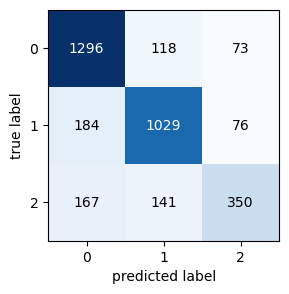

In [26]:
classifier('knn_7',knn_7,X_df,Y)

In [27]:
evaluate_df.sort_values('accuracy', ascending=False)

,classifier,accuracy
1,decision_tree_5_leaf,0.991264
0,random_forest,0.990681
2,decision_tree,0.989517
4,knn_3,0.785673
5,knn_5,0.780722
6,knn_7,0.778975
3,naive_bayes,0.633955


### Observation:
* Random Forest algorithm has the best performance with very high accuracy at 99%. It is followed by Decision Tree that has a slightly lower accuracy.
* Naive Bayes is the worst classifier in this case with accuracy at 63%.
* The Knn classifier's performance is much better than Naive Bayes but still far behind the Random Forest and Decision Tree. Moreover, its performance across different number of classes do not change much.

## 3.2. Select top important features

I will select the top important features based on Random Forest model and re-run all classifiers again by using only these selected features to see how performance of each classifier changes.

In [28]:
# Fit the model
rf = random_forest.fit(X_df,Y)

# Extract scores of features
rf_feature_importance = rf.feature_importances_

# Assign feature name and importance scores in the model
rf_feature_importance_dict = {}
for i, feature in enumerate(X_df.columns):
    rf_feature_importance_dict[feature] = round(rf_feature_importance[i],3)

# Build data frame for the importance feature
rf_feature_importance_df = pd.DataFrame(list(rf_feature_importance_dict.items()), columns=['feature','importance'])
rf_feature_importance_df = rf_feature_importance_df.sort_values('importance',ascending=False).reset_index()
rf_feature_importance_df.drop('index',axis=1,inplace=True)
rf_feature_importance_df

,feature,importance
0,tomatometer_rating,0.475
1,tomatometer_fresh_critics_count,0.151
2,tomatometer_rotten_critics_count,0.124
3,tomatometer_count,0.096
4,audience_rating,0.056
5,tomatometer_top_critics_count,0.036
6,audience_status,0.029
7,audience_count,0.014
8,content_rating_NR,0.010
9,runtime,0.005


<AxesSubplot:ylabel='feature'>

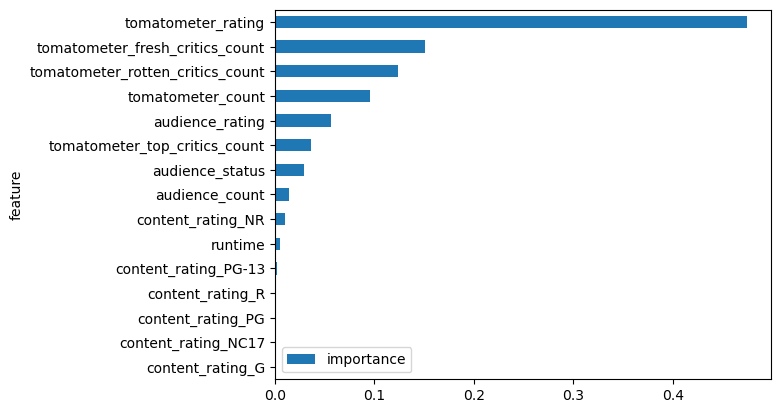

In [29]:
# Visualize the important feature
rf_feature_importance_df.sort_values('importance').plot.barh(x='feature')

The "tomatometer_rating" has a significant influnence on the model. I will select top 8 features (the importance score is higher than 1%) to run the model again.

In [30]:
selected_features = list(rf_feature_importance_df[rf_feature_importance_df.importance>0.01]['feature'])
selected_features

['tomatometer_rating',
 'tomatometer_fresh_critics_count',
 'tomatometer_rotten_critics_count',
 'tomatometer_count',
 'audience_rating',
 'tomatometer_top_critics_count',
 'audience_status',
 'audience_count']

In [31]:
X_select_df = X_df[selected_features]
X_select_df.head()

,tomatometer_rating,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,tomatometer_count,audience_rating,tomatometer_top_critics_count,audience_status,audience_count
0,49.0,73,76,149.0,53.0,43,0,254421.0
1,87.0,123,19,142.0,64.0,44,1,11574.0
2,67.0,16,8,24.0,53.0,2,0,14684.0
3,100.0,54,0,54.0,97.0,6,1,105386.0
4,89.0,24,3,27.0,74.0,5,1,68918.0


Length of train data is 13734 and length of test data is 3434
Accuracy of random_forest_feat is 0.9912638322655795
Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1487
         1.0       0.98      0.99      0.99      1289
         2.0       0.99      0.97      0.98       658

    accuracy                           0.99      3434
   macro avg       0.99      0.99      0.99      3434
weighted avg       0.99      0.99      0.99      3434

Confusion matrix:


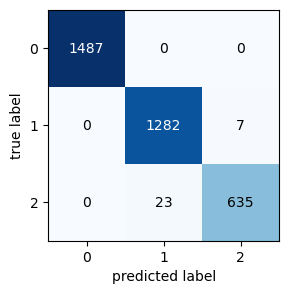

In [32]:
classifier('random_forest_feat',random_forest,X_select_df,Y)

Length of train data is 13734 and length of test data is 3434
Accuracy of decision_tree_5_leaf_feat is 0.9912638322655795
Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1487
         1.0       0.98      0.99      0.99      1289
         2.0       0.99      0.97      0.98       658

    accuracy                           0.99      3434
   macro avg       0.99      0.99      0.99      3434
weighted avg       0.99      0.99      0.99      3434

Confusion matrix:


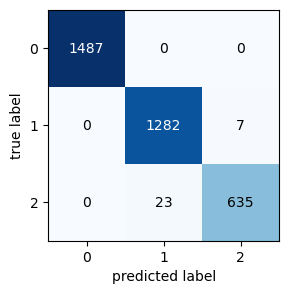

In [33]:
classifier('decision_tree_5_leaf_feat',decision_tree_5_leaf,X_select_df,Y)

Length of train data is 13734 and length of test data is 3434
Accuracy of decision_tree_feat is 0.9900990099009901
Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1487
         1.0       0.98      0.99      0.99      1289
         2.0       0.98      0.97      0.97       658

    accuracy                           0.99      3434
   macro avg       0.99      0.99      0.99      3434
weighted avg       0.99      0.99      0.99      3434

Confusion matrix:


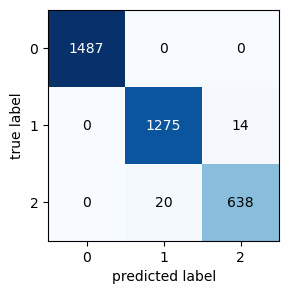

In [34]:
classifier('decision_tree_feat',decision_tree,X_select_df,Y)

Length of train data is 13734 and length of test data is 3434
Accuracy of naive_bayes_feat is 0.627256843331392
Classification report: 
               precision    recall  f1-score   support

         0.0       0.98      0.49      0.66      1487
         1.0       0.51      0.95      0.66      1289
         2.0       0.71      0.30      0.42       658

    accuracy                           0.63      3434
   macro avg       0.73      0.58      0.58      3434
weighted avg       0.75      0.63      0.61      3434

Confusion matrix:


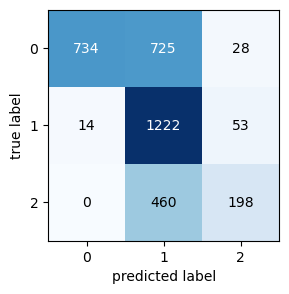

In [35]:
classifier('naive_bayes_feat',naive_bayes,X_select_df,Y)

Length of train data is 13734 and length of test data is 3434
Accuracy of knn_3_feat is 0.7932440302853815
Classification report: 
               precision    recall  f1-score   support

         0.0       0.79      0.87      0.83      1487
         1.0       0.83      0.80      0.81      1289
         2.0       0.71      0.62      0.66       658

    accuracy                           0.79      3434
   macro avg       0.78      0.76      0.77      3434
weighted avg       0.79      0.79      0.79      3434

Confusion matrix:


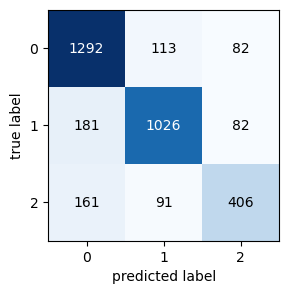

In [36]:
classifier('knn_3_feat',knn_3,X_select_df,Y)

Length of train data is 13734 and length of test data is 3434
Accuracy of knn_5_feat is 0.7888759464181713
Classification report: 
               precision    recall  f1-score   support

         0.0       0.78      0.88      0.83      1487
         1.0       0.81      0.80      0.81      1289
         2.0       0.75      0.56      0.64       658

    accuracy                           0.79      3434
   macro avg       0.78      0.75      0.76      3434
weighted avg       0.79      0.79      0.78      3434

Confusion matrix:


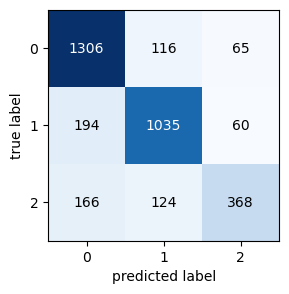

In [37]:
classifier('knn_5_feat',knn_5,X_select_df,Y)

Length of train data is 13734 and length of test data is 3434
Accuracy of knn_7_feat is 0.785381479324403
Classification report: 
               precision    recall  f1-score   support

         0.0       0.79      0.88      0.83      1487
         1.0       0.81      0.80      0.81      1289
         2.0       0.70      0.54      0.61       658

    accuracy                           0.79      3434
   macro avg       0.77      0.74      0.75      3434
weighted avg       0.78      0.79      0.78      3434

Confusion matrix:


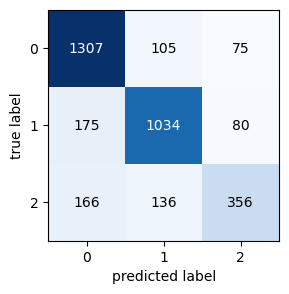

In [38]:
classifier('knn_7_feat',knn_7,X_select_df,Y)

In [39]:
evaluate_df.sort_values('accuracy',ascending=False)

,classifier,accuracy
1,decision_tree_5_leaf,0.991264
7,random_forest_feat,0.991264
8,decision_tree_5_leaf_feat,0.991264
0,random_forest,0.990681
9,decision_tree_feat,0.990099
2,decision_tree,0.989517
11,knn_3_feat,0.793244
12,knn_5_feat,0.788876
4,knn_3,0.785673
13,knn_7_feat,0.785381


### Observation:
In general, although selecting features slightly improves performance, reducing number of features helps to increase the speed of the model. If we have larger number of variables, it is reasonable to perform this task.

## 3.3. Weighted decision tree and random forest

The target variable is not balanced and it can affect performance of the algorithm. I will assign balanced class_weight parameter for both decision tree and random forest to see if it can improve the accuracy.

In [40]:
# Define the classifier
random_forest_balance = RandomForestClassifier(random_state=2, class_weight='balanced')
decision_tree_5_leaf_balance = DecisionTreeClassifier(random_state=2, class_weight='balanced',max_leaf_nodes=5)

Length of train data is 13734 and length of test data is 3434
Accuracy of random_forest_balance is 0.9912638322655795
Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1487
         1.0       0.98      0.99      0.99      1289
         2.0       0.98      0.97      0.98       658

    accuracy                           0.99      3434
   macro avg       0.99      0.99      0.99      3434
weighted avg       0.99      0.99      0.99      3434

Confusion matrix:


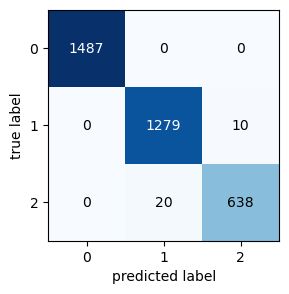

In [41]:
classifier('random_forest_balance', random_forest_balance, X_df,Y)

Length of train data is 13734 and length of test data is 3434
Accuracy of decision_tree_5_leaf_balance is 0.9895165987186954
Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1487
         1.0       0.99      0.98      0.99      1289
         2.0       0.97      0.98      0.97       658

    accuracy                           0.99      3434
   macro avg       0.99      0.99      0.99      3434
weighted avg       0.99      0.99      0.99      3434

Confusion matrix:


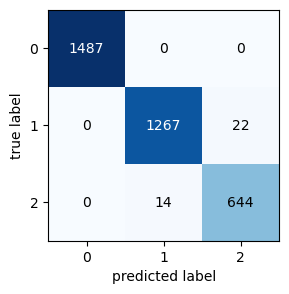

In [42]:
classifier('decision_tree_5_leaf_balance', decision_tree_5_leaf_balance, X_df,Y)

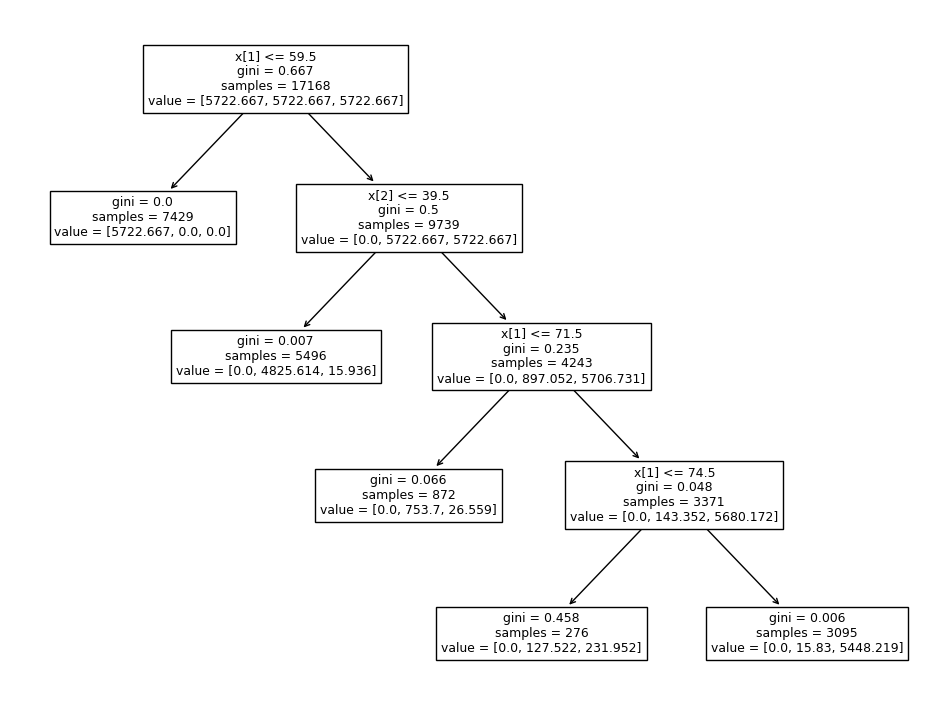

In [43]:
# Visualize decision tree
from sklearn import tree

fig, ax = plt.subplots(figsize=(12,9))
clf = decision_tree_5_leaf_balance.fit(X_df,Y)
tree.plot_tree(clf)
plt.show()

### Observation:
Balancing data does not change performance of Random Forest but slightly reduce Decision Tree (5 leaves).

# 4. Conclusions

In this project, I performed different classifiers and compare their performance with each other. I can conclude that the Random Forest and Decision Tree significantly outperformed the Naive Bayes and KNN. Naive Bayes is the worst classifier with pretty low accuracy at 0.63.

The top 5 important features that impact are listed as below:
* tomatometer_rating: percentage of positive critic ratings (heavily dominant)
* tomatometer_fresh_critics_count: number of critic ratings labeled "Fresh"
* tomatometer_rotten_critics_count: number of critic ratings labeled "Rotten"
* tomatometer_count: critic ratings counted for the calculation of the tomatomer status
* audience_rating: percentage of positive user ratings

In [44]:
# Final summary table
evaluate_df.sort_values('accuracy', ascending = False)

,classifier,accuracy
1,decision_tree_5_leaf,0.991264
7,random_forest_feat,0.991264
8,decision_tree_5_leaf_feat,0.991264
14,random_forest_balance,0.991264
0,random_forest,0.990681
9,decision_tree_feat,0.990099
2,decision_tree,0.989517
15,decision_tree_5_leaf_balance,0.989517
11,knn_3_feat,0.793244
12,knn_5_feat,0.788876
